
---

# Exploratory Data Analysis (EDA)

After completing the feature engineering process, we perform exploratory data analysis to understand the characteristics of our enriched dataset and identify patterns that could be useful for anomaly detection.

## EDA Objectives

1. **Data Overview**: Understand the basic structure and quality of the dataset
2. **Feature Analysis**: Examine the distribution and characteristics of engineered features
3. **Pattern Discovery**: Identify trends and patterns in transaction behavior
4. **Anomaly Indicators**: Look for potential anomalies in the data
5. **Feature Relationships**: Understand correlations between different features


In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd





## Step 1: Basic Data Overview

Let's start by examining the basic structure and quality of our enriched dataset.

In [3]:
# Basic dataset information
df_final_with_features=pd.read_csv('../data/processed/finalDataSet.csv')
print("📋 Dataset Overview:")
print(f"Shape: {df_final_with_features.shape}")
print(f"Memory usage: {df_final_with_features.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data types: {df_final_with_features.dtypes.value_counts().to_dict()}")

# Display first few rows
print(f"\n🔍 First 5 rows:")
df_final_with_features.head()


📋 Dataset Overview:
Shape: (48042, 103)
Memory usage: 109.29 MB
Data types: {dtype('float64'): 41, dtype('int64'): 35, dtype('O'): 27}

🔍 First 5 rows:


,Unnamed: 0,TransactionID,AccountOriginID,AccountDestinationID,TransactionTypeID,Amount,TransactionDate,BranchID,Description,TransactionTypeName,...,TransactionMonth,TransactionQuarter,IsWeekend,IsBusinessHours,IsNightTime,LargeTransferFlag,VeryLargeTransferFlag,UnusualTimingFlag,HighRiskFlag,CrossTypeTransfer
0,0,3000000,201241,200847,3,2984.02,2023-12-29 10:00:00.000000,26,Transaction 0,Transfer,...,12,4,0,1,0,0,0,0,1,1
1,1,3000001,201103,200262,3,4713.48,2023-05-12 02:00:00.000000,23,Transaction 1,Transfer,...,5,2,0,0,1,0,0,1,1,0
2,2,3000002,201563,200589,3,1600.23,2020-07-14 17:00:00.000000,5,Transaction 2,Transfer,...,7,3,0,1,0,0,0,0,1,1
3,3,3000003,200512,200404,1,4279.61,2023-09-09 07:00:00.000000,36,Transaction 3,Deposit,...,9,3,1,0,0,0,0,1,1,0
4,4,3000004,201107,201408,2,4125.32,2022-05-29 02:00:00.000000,44,Transaction 4,Withdrawal,...,5,2,1,0,1,0,0,1,0,1


In [4]:
# Dataset information and data types
print("📊 Dataset Information:")
df_final_with_features.info()

print(f"\n📈 Basic Statistics:")
df_final_with_features.describe()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48042 entries, 0 to 48041
Columns: 103 entries, Unnamed: 0 to CrossTypeTransfer
dtypes: float64(41), int64(35), object(27)
memory usage: 37.8+ MB

📈 Basic Statistics:


,Unnamed: 0,TransactionID,AccountOriginID,AccountDestinationID,TransactionTypeID,Amount,BranchID,Origin_AccountID,Origin_CustomerID,Origin_AccountTypeID,...,TransactionMonth,TransactionQuarter,IsWeekend,IsBusinessHours,IsNightTime,LargeTransferFlag,VeryLargeTransferFlag,UnusualTimingFlag,HighRiskFlag,CrossTypeTransfer
count,48042.000000,4.804200e+04,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,47581.000000,47581.000000,47581.000000,...,48042.000000,48042.00000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000,48042.000000
mean,24020.500000,3.024754e+06,200823.960306,200819.266954,2.194039,2503.422492,25.630469,200824.028793,10551.940375,3.050104,...,6.419008,2.47779,0.282753,0.370093,0.376379,0.053370,0.031826,0.551642,0.414408,0.698993
std,13868.675153,1.427546e+04,476.583142,476.287363,0.982785,1442.528023,14.477989,477.645930,311.243408,1.411287,...,3.508860,1.12850,0.450342,0.482834,0.484482,0.224772,0.175539,0.497331,0.492625,0.458701
min,0.000000,3.000000e+06,200000.000000,200000.000000,1.000000,1.010000,1.000000,200000.000000,10000.000000,1.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12010.250000,3.012405e+06,200412.000000,200408.000000,1.000000,1260.405000,13.000000,200412.000000,10295.000000,2.000000,...,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24020.500000,3.024758e+06,200819.000000,200814.000000,2.000000,2503.480000,26.000000,200817.000000,10545.000000,3.000000,...,6.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,36030.750000,3.037099e+06,201238.000000,201230.000000,3.000000,3752.177500,38.000000,201241.000000,10819.000000,4.000000,...,9.000000,3.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,48041.000000,3.049499e+06,201650.000000,201650.000000,4.000000,4999.590000,50.000000,201650.000000,11099.000000,5.000000,...,12.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



## Step 2: Univariate Analysis

Let's examine the distribution of key features to understand their characteristics and identify potential outliers.


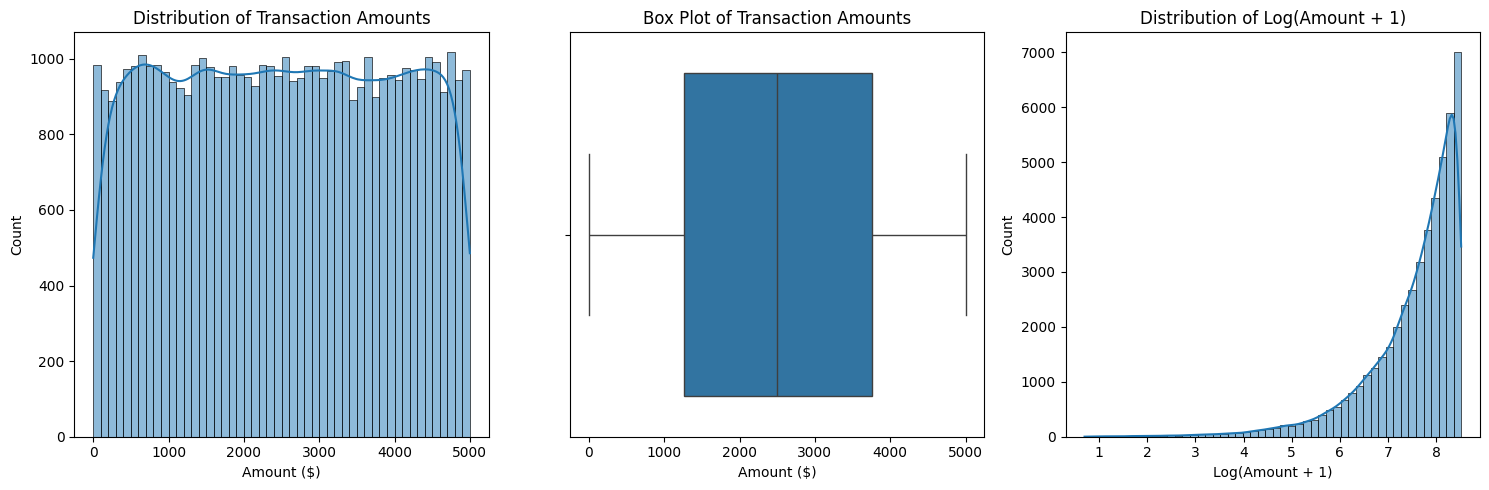

💰 Transaction Amount Statistics:
Mean: $2503.42
Median: $2503.48
Std: $1442.53
Min: $1.01
Max: $4999.59
1st percentile: $48.66
5th percentile: $258.40
95th percentile: $4753.86
99th percentile: $4949.50


In [5]:
# Transaction Amount Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=df_final_with_features['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_final_with_features['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount ($)')

plt.subplot(1, 3, 3)
# Log scale for better visualization
sns.histplot(x=np.log1p(df_final_with_features['Amount']), bins=50, kde=True)
plt.title('Distribution of Log(Amount + 1)')
plt.xlabel('Log(Amount + 1)')

plt.tight_layout()
plt.show()

# Amount statistics
print("💰 Transaction Amount Statistics:")
print(f"Mean: ${df_final_with_features['Amount'].mean():.2f}")
print(f"Median: ${df_final_with_features['Amount'].median():.2f}")
print(f"Std: ${df_final_with_features['Amount'].std():.2f}")
print(f"Min: ${df_final_with_features['Amount'].min():.2f}")
print(f"Max: ${df_final_with_features['Amount'].max():.2f}")
print(f"1st percentile: ${df_final_with_features['Amount'].quantile(0.01):.2f}")
print(f"5th percentile: ${df_final_with_features['Amount'].quantile(0.05):.2f}")
print(f"95th percentile: ${df_final_with_features['Amount'].quantile(0.95):.2f}")
print(f"99th percentile: ${df_final_with_features['Amount'].quantile(0.99):.2f}")


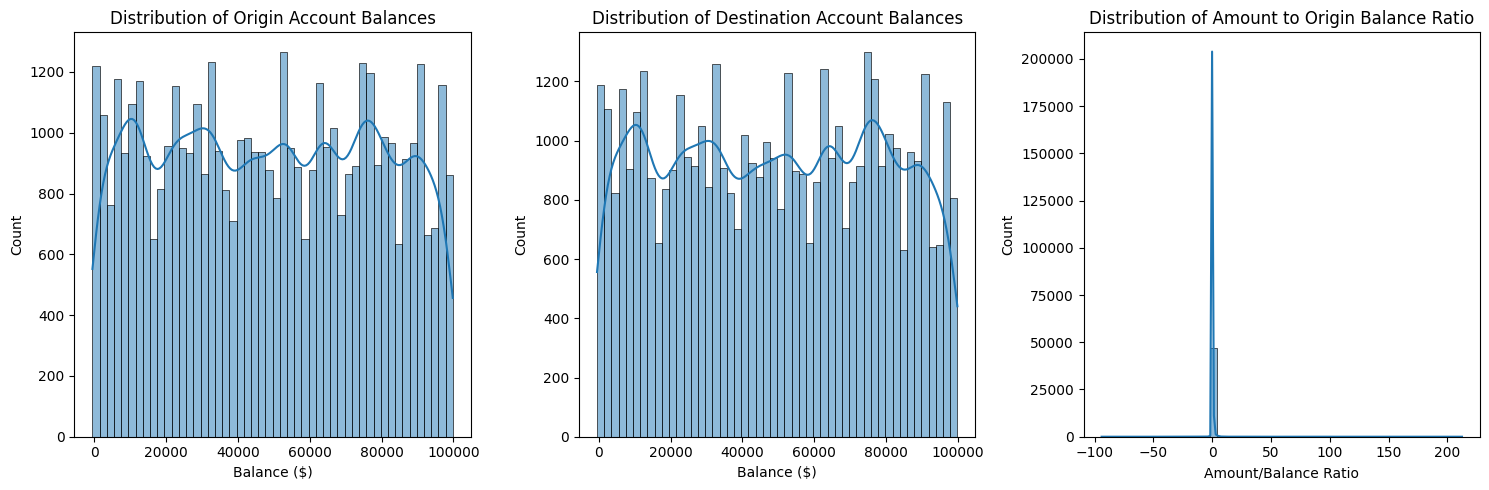

🏦 Account Balance Statistics:
Origin Balance - Mean: $48899.17
Origin Balance - Median: $48911.97
Dest Balance - Mean: $48865.70
Dest Balance - Median: $48963.44
Amount to Origin Balance - Mean: 0.239
Amount to Origin Balance - 95th percentile: 0.540
Amount to Origin Balance - 99th percentile: 3.174


In [6]:

# Account Balance Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=df_final_with_features['Origin_Balance'], bins=50, kde=True)
plt.title('Distribution of Origin Account Balances')
plt.xlabel('Balance ($)')

plt.subplot(1, 3, 2)
sns.histplot(x=df_final_with_features['Dest_Balance'], bins=50, kde=True)
plt.title('Distribution of Destination Account Balances')
plt.xlabel('Balance ($)')

plt.subplot(1, 3, 3)
# Amount to balance ratios
sns.histplot(x=df_final_with_features['Amount_to_OriginBalance'], bins=50, kde=True)
plt.title('Distribution of Amount to Origin Balance Ratio')
plt.xlabel('Amount/Balance Ratio')

plt.tight_layout()
plt.show()

# Balance statistics
print("🏦 Account Balance Statistics:")
print(f"Origin Balance - Mean: ${df_final_with_features['Origin_Balance'].mean():.2f}")
print(f"Origin Balance - Median: ${df_final_with_features['Origin_Balance'].median():.2f}")
print(f"Dest Balance - Mean: ${df_final_with_features['Dest_Balance'].mean():.2f}")
print(f"Dest Balance - Median: ${df_final_with_features['Dest_Balance'].median():.2f}")
print(f"Amount to Origin Balance - Mean: {df_final_with_features['Amount_to_OriginBalance'].mean():.3f}")
print(f"Amount to Origin Balance - 95th percentile: {df_final_with_features['Amount_to_OriginBalance'].quantile(0.95):.3f}")
print(f"Amount to Origin Balance - 99th percentile: {df_final_with_features['Amount_to_OriginBalance'].quantile(0.99):.3f}")

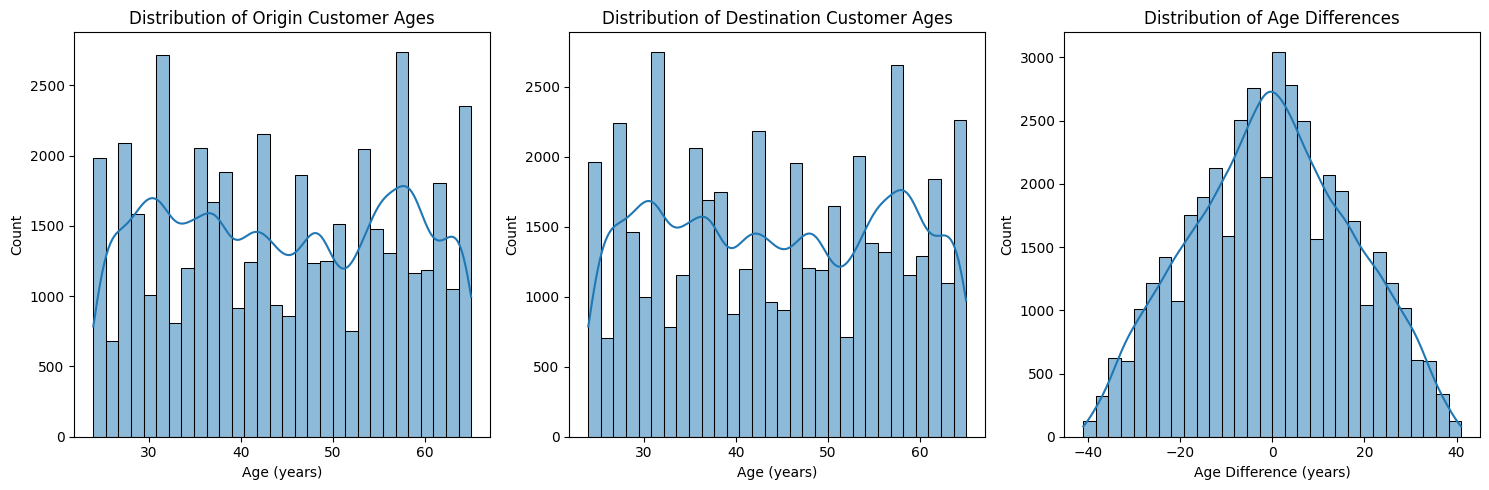

👥 Customer Age Statistics:
Origin Age - Mean: 44.6 years
Origin Age - Median: 44.0 years
Dest Age - Mean: 44.6 years
Dest Age - Median: 44.0 years
Age Difference - Mean: -0.0 years


In [7]:
# Customer Age Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=df_final_with_features['Origin_Age'], bins=30, kde=True)
plt.title('Distribution of Origin Customer Ages')
plt.xlabel('Age (years)')

plt.subplot(1, 3, 2)
sns.histplot(x=df_final_with_features['Dest_Age'], bins=30, kde=True)
plt.title('Distribution of Destination Customer Ages')
plt.xlabel('Age (years)')

plt.subplot(1, 3, 3)
sns.histplot(x=df_final_with_features['Age_Difference'], bins=30, kde=True)
plt.title('Distribution of Age Differences')
plt.xlabel('Age Difference (years)')

plt.tight_layout()
plt.show()

# Age statistics
print("👥 Customer Age Statistics:")
print(f"Origin Age - Mean: {df_final_with_features['Origin_Age'].mean():.1f} years")
print(f"Origin Age - Median: {df_final_with_features['Origin_Age'].median():.1f} years")
print(f"Dest Age - Mean: {df_final_with_features['Dest_Age'].mean():.1f} years")
print(f"Dest Age - Median: {df_final_with_features['Dest_Age'].median():.1f} years")
print(f"Age Difference - Mean: {df_final_with_features['Age_Difference'].mean():.1f} years")

## Step 3: Categorical Feature Analysis

Let's examine the distribution of categorical features and their relationship with transaction amounts.



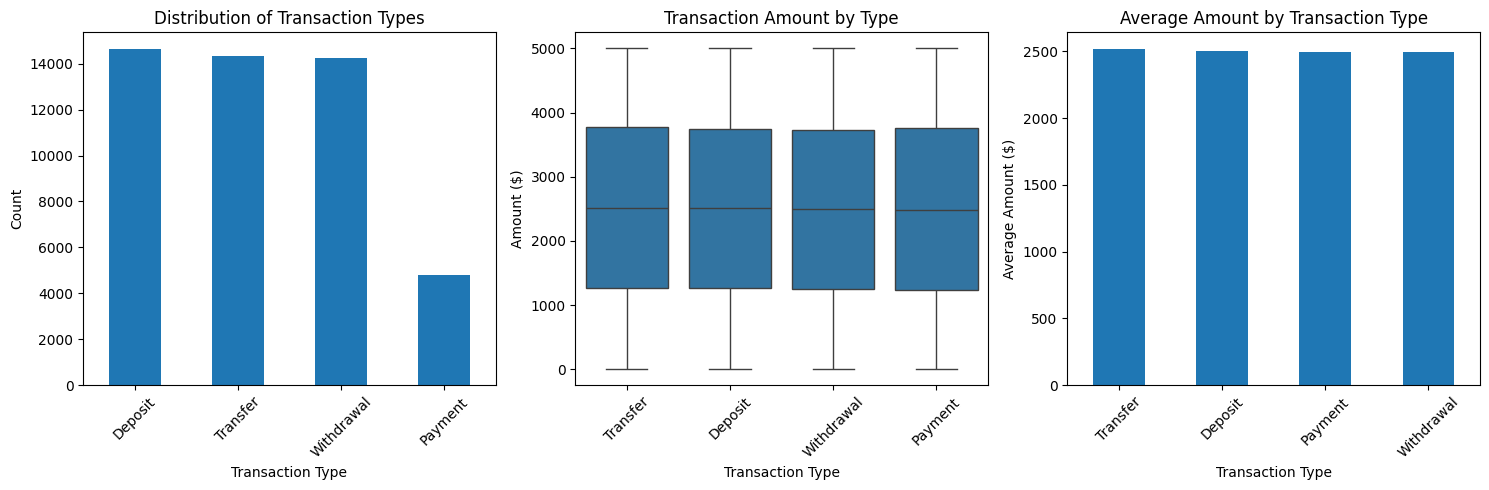

💳 Transaction Type Statistics:
TransactionTypeName
Deposit       14633
Transfer      14333
Withdrawal    14265
Payment        4811
Name: count, dtype: int64

Average amounts by type:
TransactionTypeName
Transfer      2515.76
Deposit       2500.97
Payment       2497.78
Withdrawal    2495.44
Name: Amount, dtype: float64


In [8]:
# Transaction Type Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_final_with_features['TransactionTypeName'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='TransactionTypeName', y='Amount', data=df_final_with_features)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
# Average amount by transaction type
avg_amount_by_type = df_final_with_features.groupby('TransactionTypeName')['Amount'].mean().sort_values(ascending=False)
avg_amount_by_type.plot(kind='bar')
plt.title('Average Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Transaction type statistics
print("💳 Transaction Type Statistics:")
print(df_final_with_features['TransactionTypeName'].value_counts())
print(f"\nAverage amounts by type:")
print(avg_amount_by_type.round(2))


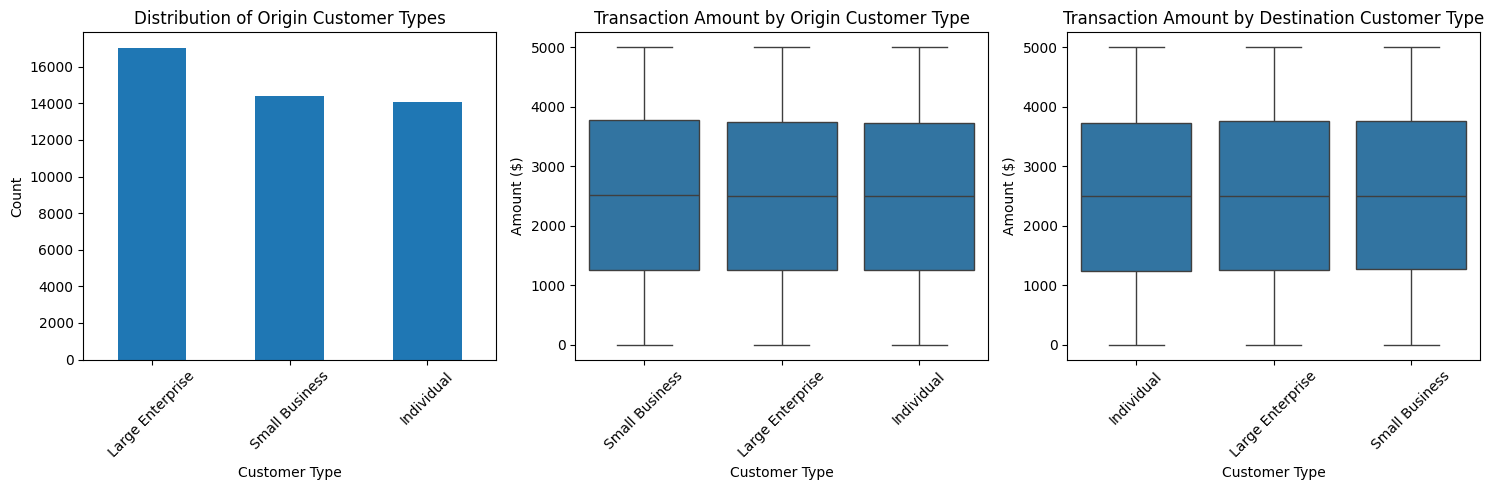

👤 Customer Type Statistics:
Origin Customer Types:
Origin_TypeName
Large Enterprise    17031
Small Business      14418
Individual          14092
Name: count, dtype: int64

Destination Customer Types:
Dest_TypeName
Large Enterprise    17141
Small Business      14282
Individual          13992
Name: count, dtype: int64


In [9]:
# Customer Type Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_final_with_features['Origin_TypeName'].value_counts().plot(kind='bar')
plt.title('Distribution of Origin Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Origin_TypeName', y='Amount', data=df_final_with_features)
plt.title('Transaction Amount by Origin Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Dest_TypeName', y='Amount', data=df_final_with_features)
plt.title('Transaction Amount by Destination Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Customer type statistics
print("👤 Customer Type Statistics:")
print("Origin Customer Types:")
print(df_final_with_features['Origin_TypeName'].value_counts())
print("\nDestination Customer Types:")
print(df_final_with_features['Dest_TypeName'].value_counts())


## Step 4: Temporal Analysis

Let's examine time-based patterns in the transaction data.


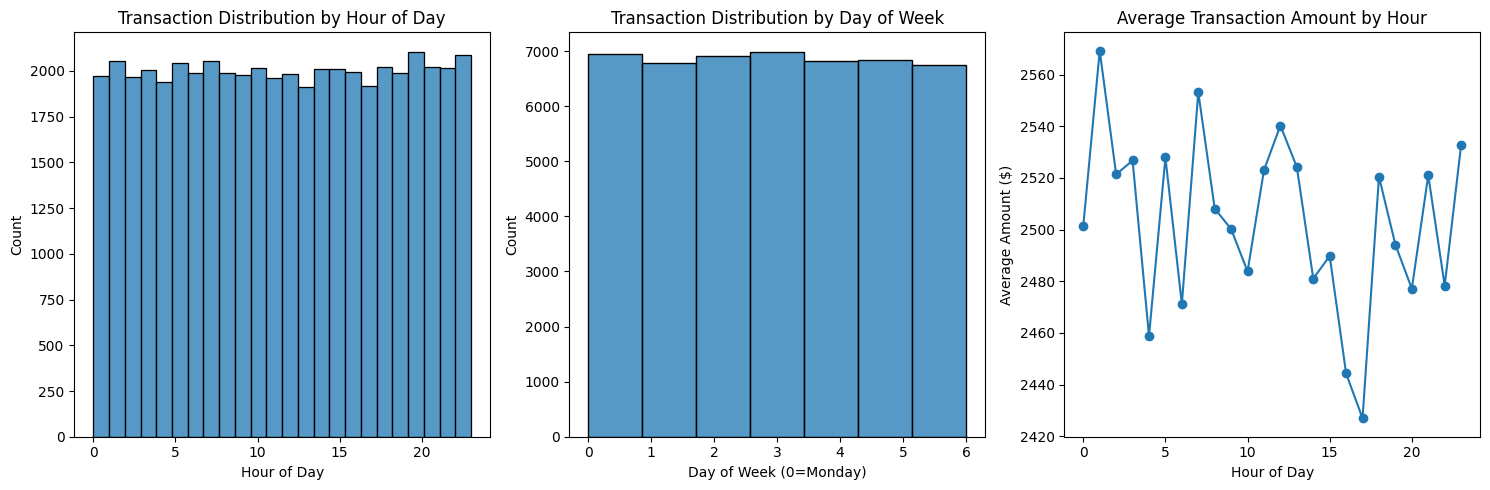

⏰ Temporal Statistics:
Transactions per hour (mean): 2001.8
Peak hour: 20
Weekend transactions: 13584 (28.3%)
Night time transactions: 18082 (37.6%)
Business hours transactions: 17780 (37.0%)


In [10]:
# Temporal Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_final_with_features['TransactionHour'], bins=24)
plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df_final_with_features['TransactionWeekday'], bins=7)
plt.title('Transaction Distribution by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
# Average amount by hour
hourly_avg = df_final_with_features.groupby('TransactionHour')['Amount'].mean()
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Transaction Amount by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount ($)')

plt.tight_layout()
plt.show()

# Temporal statistics
print("⏰ Temporal Statistics:")
print(f"Transactions per hour (mean): {df_final_with_features['TransactionHour'].value_counts().mean():.1f}")
print(f"Peak hour: {df_final_with_features['TransactionHour'].mode()[0]}")
print(f"Weekend transactions: {df_final_with_features['IsWeekend'].sum()} ({df_final_with_features['IsWeekend'].mean()*100:.1f}%)")
print(f"Night time transactions: {df_final_with_features['IsNightTime'].sum()} ({df_final_with_features['IsNightTime'].mean()*100:.1f}%)")
print(f"Business hours transactions: {df_final_with_features['IsBusinessHours'].sum()} ({df_final_with_features['IsBusinessHours'].mean()*100:.1f}%)")

## Step 5: Bivariate Analysis

Let's examine relationships between different features to identify patterns and potential anomalies.


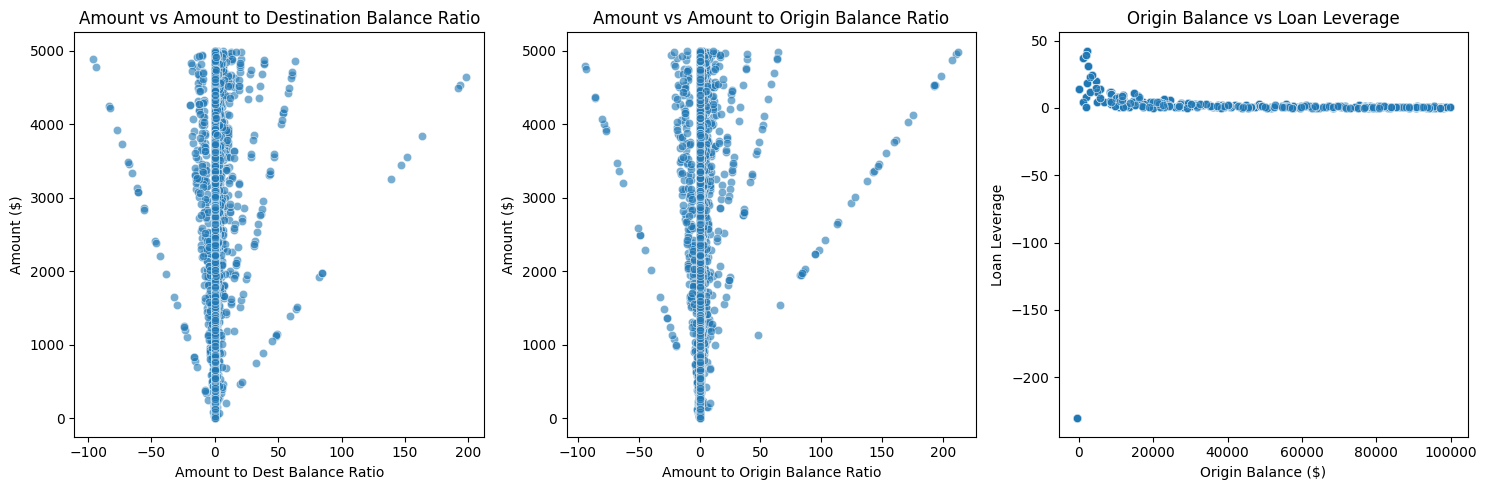

🔗 Correlation Analysis:
                         Amount  Amount_to_OriginBalance  \
Amount                    1.000                    0.037   
Amount_to_OriginBalance   0.037                    1.000   
Amount_to_DestBalance     0.038                    0.002   
Origin_Balance            0.011                   -0.074   
Dest_Balance             -0.002                   -0.001   
Origin_Age               -0.001                   -0.027   
Dest_Age                 -0.001                   -0.005   
Origin_LoanLeverage       0.011                    0.376   
Dest_LoanLeverage        -0.004                    0.001   

                         Amount_to_DestBalance  Origin_Balance  Dest_Balance  \
Amount                                   0.038           0.011        -0.002   
Amount_to_OriginBalance                  0.002          -0.074        -0.001   
Amount_to_DestBalance                    1.000          -0.009        -0.076   
Origin_Balance                          -0.009         

In [11]:
# Amount vs Balance Relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df_final_with_features['Amount_to_DestBalance'], y='Amount', data=df_final_with_features, alpha=0.6)
plt.title('Amount vs Amount to Destination Balance Ratio')
plt.xlabel('Amount to Dest Balance Ratio')
plt.ylabel('Amount ($)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Amount_to_OriginBalance', y='Amount', data=df_final_with_features, alpha=0.6)
plt.title('Amount vs Amount to Origin Balance Ratio')
plt.xlabel('Amount to Origin Balance Ratio')
plt.ylabel('Amount ($)')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_final_with_features['Origin_Balance'], y=df_final_with_features['Origin_LoanLeverage'], alpha=0.6)
plt.title('Origin Balance vs Loan Leverage')
plt.xlabel('Origin Balance ($)')
plt.ylabel('Loan Leverage')

plt.tight_layout()
plt.show()

# Correlation analysis
print("🔗 Correlation Analysis:")
correlation_features = ['Amount', 'Amount_to_OriginBalance', 'Amount_to_DestBalance', 
                       'Origin_Balance', 'Dest_Balance', 'Origin_Age', 'Dest_Age',
                       'Origin_LoanLeverage', 'Dest_LoanLeverage']

correlation_matrix = df_final_with_features[correlation_features].corr()
print(correlation_matrix.round(3))


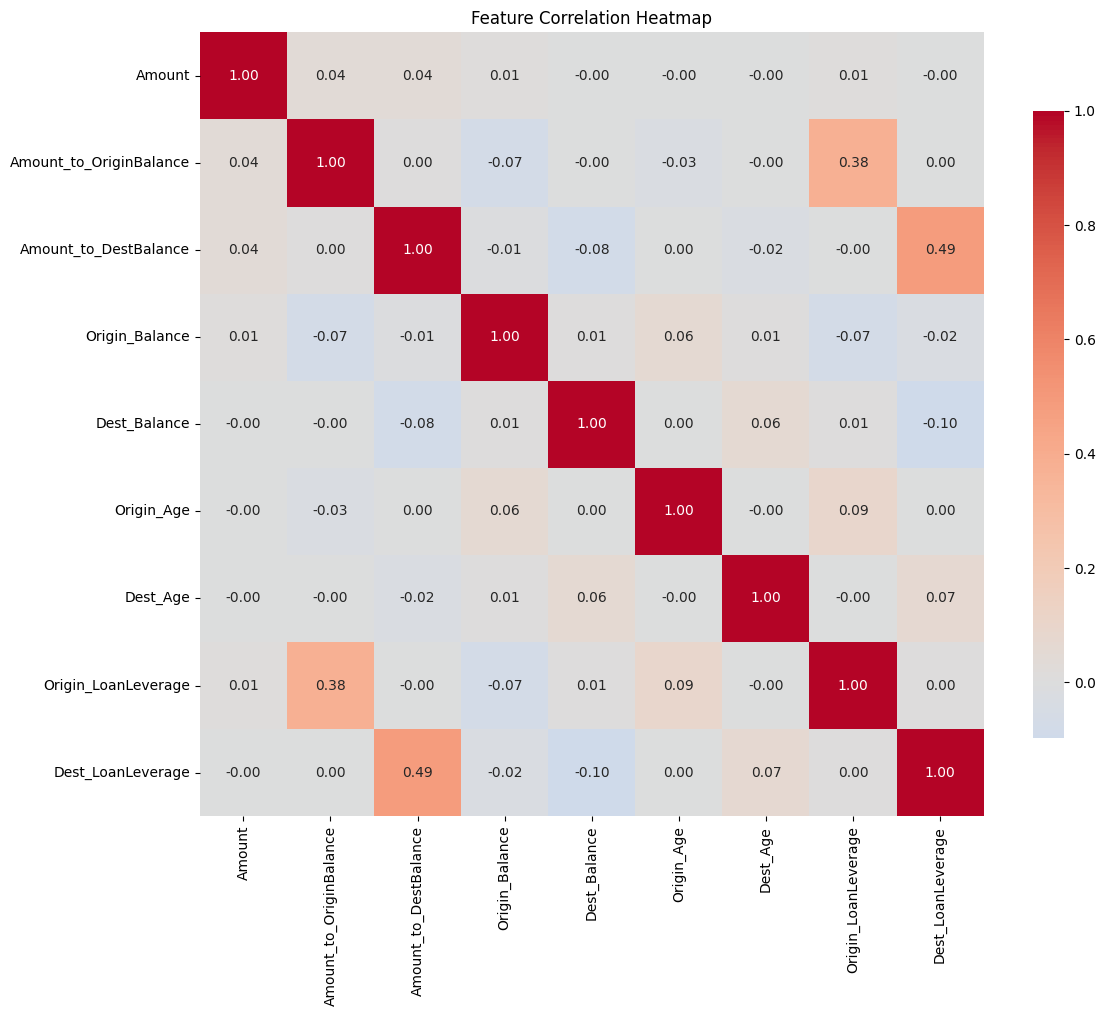

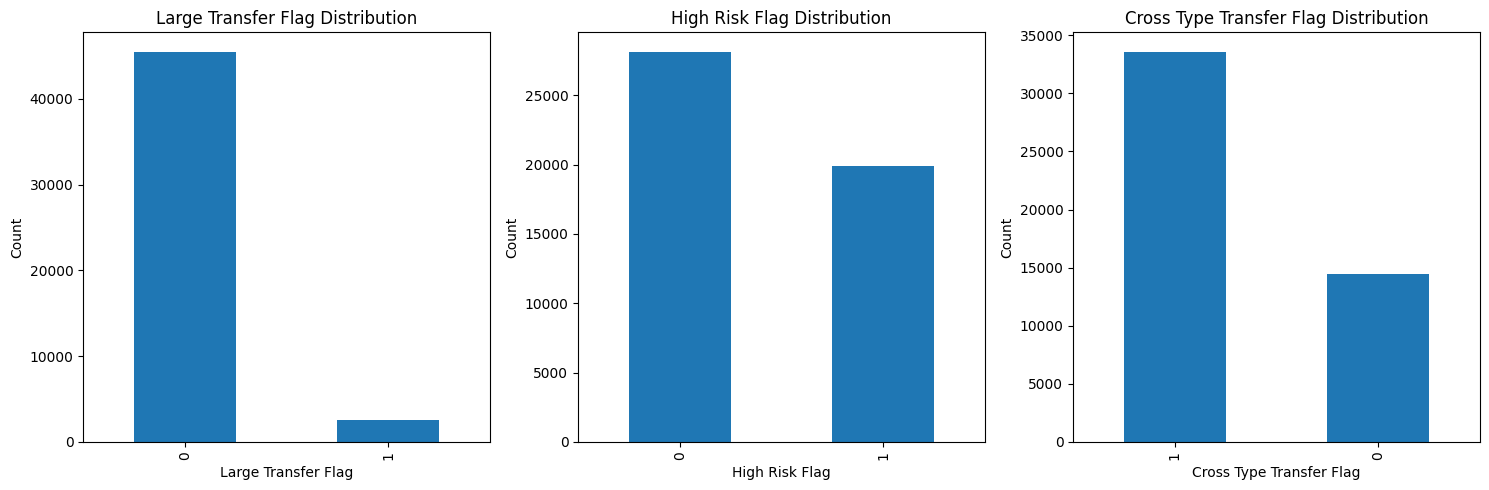

🚨 Anomaly Flag Statistics:
Large Transfer Flag: 2564 (5.3%)
Very Large Transfer Flag: 1529 (3.2%)
High Risk Flag: 19909 (41.4%)
Cross Type Transfer: 33581 (69.9%)
Unusual Timing Flag: 26502 (55.2%)


In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Anomaly Flag Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_final_with_features['LargeTransferFlag'].value_counts().plot(kind='bar')
plt.title('Large Transfer Flag Distribution')
plt.xlabel('Large Transfer Flag')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df_final_with_features['HighRiskFlag'].value_counts().plot(kind='bar')
plt.title('High Risk Flag Distribution')
plt.xlabel('High Risk Flag')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
df_final_with_features['CrossTypeTransfer'].value_counts().plot(kind='bar')
plt.title('Cross Type Transfer Flag Distribution')
plt.xlabel('Cross Type Transfer Flag')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Anomaly flag statistics
print("🚨 Anomaly Flag Statistics:")
print(f"Large Transfer Flag: {df_final_with_features['LargeTransferFlag'].sum()} ({df_final_with_features['LargeTransferFlag'].mean()*100:.1f}%)")
print(f"Very Large Transfer Flag: {df_final_with_features['VeryLargeTransferFlag'].sum()} ({df_final_with_features['VeryLargeTransferFlag'].mean()*100:.1f}%)")
print(f"High Risk Flag: {df_final_with_features['HighRiskFlag'].sum()} ({df_final_with_features['HighRiskFlag'].mean()*100:.1f}%)")
print(f"Cross Type Transfer: {df_final_with_features['CrossTypeTransfer'].sum()} ({df_final_with_features['CrossTypeTransfer'].mean()*100:.1f}%)")
print(f"Unusual Timing Flag: {df_final_with_features['UnusualTimingFlag'].sum()} ({df_final_with_features['UnusualTimingFlag'].mean()*100:.1f}%)")



## Step 6: Feature Correlation & Redundancy Analysis

Let's examine feature correlations to identify redundant features and understand feature relationships.


In [13]:
# Feature Correlation Analysis
print("🔍 Feature Correlation Analysis:")

# Select numeric features for correlation analysis
numeric_features = df_final_with_features.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns and other non-predictive features
exclude_features = ['AccountOriginID', 'AccountDestinationID', 'Origin_AccountID', 'Dest_AccountID',
                   'Origin_CustomerID', 'Dest_CustomerID', 'BranchID', 'TransactionID']

numeric_features = [f for f in numeric_features if f not in exclude_features]

print(f"Analyzing {len(numeric_features)} numeric features...")

# Calculate correlation matrix
correlation_matrix_full = df_final_with_features[numeric_features].corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix_full.columns)):
    for j in range(i+1, len(correlation_matrix_full.columns)):
        corr_value = correlation_matrix_full.iloc[i, j]
        if abs(corr_value) > 0.8:  # High correlation threshold
            high_corr_pairs.append({
                'Feature1': correlation_matrix_full.columns[i],
                'Feature2': correlation_matrix_full.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    print(f"\n⚠️  High correlation pairs (|r| > 0.8):")
    for pair in high_corr_pairs:
        print(f"  {pair['Feature1']} ↔ {pair['Feature2']}: {pair['Correlation']:.3f}")
else:
    print(f"\n✅ No highly correlated feature pairs found (|r| > 0.8)")

# Feature importance based on variance
feature_variance = df_final_with_features[numeric_features].var().sort_values(ascending=False)
print(f"\n📊 Top 10 features by variance:")
print(feature_variance.head(10).round(4))

# Missing value analysis
missing_analysis = df_final_with_features[numeric_features].isnull().sum().sort_values(ascending=False)
missing_features = missing_analysis[missing_analysis > 0]

if len(missing_features) > 0:
    print(f"\n❌ Features with missing values:")
    for feature, count in missing_features.items():
        percentage = (count / len(df_final_with_features)) * 100
        print(f"  {feature}: {count} ({percentage:.1f}%)")
else:
    print(f"\n✅ No missing values in numeric features")


🔍 Feature Correlation Analysis:
Analyzing 68 numeric features...

⚠️  High correlation pairs (|r| > 0.8):
  Amount ↔ Amount_to_AvgTransaction: 1.000
  Origin_AccountStatusID ↔ Origin_AccountInactive: 0.934
  Dest_AccountStatusID ↔ Dest_AccountInactive: 0.934
  Origin_CustomerTypeID ↔ Origin_IsIndividual: -0.865
  Dest_CustomerTypeID ↔ Dest_IsIndividual: -0.865
  Branch_AddressID ↔ Branch_Branch_AddressID: 1.000
  Origin_AvgInterestRate ↔ Origin_MaxInterestRate: 0.973
  Origin_AvgInterestRate ↔ Origin_MinInterestRate: 0.973
  Origin_MaxInterestRate ↔ Origin_MinInterestRate: 0.894
  Dest_AvgInterestRate ↔ Dest_MaxInterestRate: 0.976
  Dest_AvgInterestRate ↔ Dest_MinInterestRate: 0.976
  Dest_MaxInterestRate ↔ Dest_MinInterestRate: 0.904
  TransactionMonth ↔ TransactionQuarter: 0.972

📊 Top 10 features by variance:
Origin_TotalPrincipal          1.194340e+09
Dest_TotalPrincipal            1.148359e+09
Origin_Balance                 8.496400e+08
Dest_Balance                   8.483431e+08


## Step 7: EDA Summary and Insights

Let's summarize our findings from the exploratory data analysis.



In [14]:
# EDA Summary
print("📋 EDA Summary and Insights")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"  • Total transactions: {len(df_final_with_features):,}")
print(f"  • Total features: {len(df_final_with_features.columns)}")
print(f"  • Memory usage: {df_final_with_features.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n💰 Transaction Amount Insights:")
print(f"  • Average transaction: ${df_final_with_features['Amount'].mean():.2f}")
print(f"  • Median transaction: ${df_final_with_features['Amount'].median():.2f}")
print(f"  • 95th percentile: ${df_final_with_features['Amount'].quantile(0.95):.2f}")
print(f"  • 99th percentile: ${df_final_with_features['Amount'].quantile(0.99):.2f}")

print(f"\n🏦 Account Balance Insights:")
print(f"  • Average origin balance: ${df_final_with_features['Origin_Balance'].mean():.2f}")
print(f"  • Average destination balance: ${df_final_with_features['Dest_Balance'].mean():.2f}")
print(f"  • Large transfers (>50% of balance): {df_final_with_features['LargeTransferFlag'].sum():,} ({df_final_with_features['LargeTransferFlag'].mean()*100:.1f}%)")

print(f"\n👥 Customer Insights:")
print(f"  • Average origin customer age: {df_final_with_features['Origin_Age'].mean():.1f} years")
print(f"  • Average destination customer age: {df_final_with_features['Dest_Age'].mean():.1f} years")
print(f"  • Cross-type transfers: {df_final_with_features['CrossTypeTransfer'].sum():,} ({df_final_with_features['CrossTypeTransfer'].mean()*100:.1f}%)")

print(f"\n⏰ Temporal Insights:")
print(f"  • Peak transaction hour: {df_final_with_features['TransactionHour'].mode()[0]}")
print(f"  • Weekend transactions: {df_final_with_features['IsWeekend'].sum():,} ({df_final_with_features['IsWeekend'].mean()*100:.1f}%)")
print(f"  • Night time transactions: {df_final_with_features['IsNightTime'].sum():,} ({df_final_with_features['IsNightTime'].mean()*100:.1f}%)")

print(f"\n🚨 Anomaly Detection Insights:")
print(f"  • High-risk transactions: {df_final_with_features['HighRiskFlag'].sum():,} ({df_final_with_features['HighRiskFlag'].mean()*100:.1f}%)")
print(f"  • Very large transfers (>90% of balance): {df_final_with_features['VeryLargeTransferFlag'].sum():,} ({df_final_with_features['VeryLargeTransferFlag'].mean()*100:.1f}%)")
print(f"  • Unusual timing transactions: {df_final_with_features['UnusualTimingFlag'].sum():,} ({df_final_with_features['UnusualTimingFlag'].mean()*100:.1f}%)")

print(f"\n💳 Transaction Type Distribution:")
for ttype, count in df_final_with_features['TransactionTypeName'].value_counts().items():
    percentage = (count / len(df_final_with_features)) * 100
    print(f"  • {ttype}: {count:,} ({percentage:.1f}%)")

print(f"\n✅ EDA Analysis Complete!")
print(f"📈 The dataset is ready for machine learning model training.")
print(f"🎯 Key features identified for anomaly detection:")
print(f"  • Amount-based features (ratios, flags)")
print(f"  • Temporal features (hour, day, timing flags)")
print(f"  • Customer demographic features (age, type)")
print(f"  • Account status features (inactive, type flags)")
print(f"  • Loan-related features (leverage, counts)")


📋 EDA Summary and Insights

📊 Dataset Overview:
  • Total transactions: 48,042
  • Total features: 103
  • Memory usage: 109.3 MB

💰 Transaction Amount Insights:
  • Average transaction: $2503.42
  • Median transaction: $2503.48
  • 95th percentile: $4753.86
  • 99th percentile: $4949.50

🏦 Account Balance Insights:
  • Average origin balance: $48899.17
  • Average destination balance: $48865.70
  • Large transfers (>50% of balance): 2,564 (5.3%)

👥 Customer Insights:
  • Average origin customer age: 44.6 years
  • Average destination customer age: 44.6 years
  • Cross-type transfers: 33,581 (69.9%)

⏰ Temporal Insights:
  • Peak transaction hour: 20
  • Weekend transactions: 13,584 (28.3%)
  • Night time transactions: 18,082 (37.6%)

🚨 Anomaly Detection Insights:
  • High-risk transactions: 19,909 (41.4%)
  • Very large transfers (>90% of balance): 1,529 (3.2%)
  • Unusual timing transactions: 26,502 (55.2%)

💳 Transaction Type Distribution:
  • Deposit: 14,633 (30.5%)
  • Transfer: 1